In [201]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from opencage.geocoder import OpenCageGeocode
from geopy.distance import geodesic


seaborn.set()

In [131]:
df = pd.read_csv('stages_TDF.csv').dropna()
df = df.dropna() # Winner_Country have many null values
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].map(lambda x: x.year) # add year column
df['rider_name'] = df['Winner'].str.replace(' ', '_')

In [96]:
riders = pd.DataFrame(columns = ['rider_name', 'birth_date', 'birth_city'])

for rider in df['Winner'].unique():
    name = str(rider).replace(' ', '_')
    print(name)
    url = 'https://fr.wikipedia.org/wiki/' + name
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    date = soup.find("span", {"class": "wd_p569"})
    city = soup.find("span", {"class": "wd_p19"})
    
    if date == None:
        birth_date = None
    else:
        birth_date = date.find("time", {"class": "nowrap date-lien"})['datetime']
    
    if city == None:
        birth_city = None
    else:
        birth_city = city.get_text()

    riders = riders.append({'rider_name' : name, 'birth_date' : birth_date, 'birth_city' : birth_city}, ignore_index=True)

Geraint_Thomas
Marcel_Kittel
Peter_Sagan
Arnaud_Démare
Fabio_Aru
Lilian_Calmejane
Rigoberto_Urán
Romain_Bardet
Warren_Barguil
Michael_Matthews
Bauke_Mollema
Primož_Roglič
Edvald_Boasson_Hagen
Maciej_Bodnar
Dylan_Groenewegen
Mark_Cavendish
Greg_Van_Avermaet
Steve_Cummings
Chris_Froome
Tom_Dumoulin
Thomas_De_Gendt
Jarlinson_Pantano
Ilnur_Zakarin
Ion_Izagirre
André_Greipel
Rohan_Dennis
Joaquim_Rodríguez
Tony_Martin
Zdeněk_Štybar
Alexis_Vuillermoz
Rafał_Majka
Rubén_Plaza_Molina
Simon_Geschke
Vincenzo_Nibali
Thibaut_Pinot
Lars_Boom
Matteo_Trentin
Blel_Kadri
Tony_Gallopin
Alexander_Kristoff
Michael_Rogers
Ramūnas_Navardauskas
Jan_Bakelants
Simon_Gerrans
Dan_Martin
Rui_Costa
Christophe_Riblon
Nairo_Quintana
Fabian_Cancellara
Bradley_Wiggins
Thomas_Voeckler
Pierre_Rolland
David_Millar
Luis_León_Sánchez
Pierrick_Fédrigo
Alejandro_Valverde
Philippe_Gilbert
Tyler_Farrar
Cadel_Evans
Samuel_Sánchez
Thor_Hushovd
Jelle_Vanendert
Andy_Schleck
Alessandro_Petacchi
Sylvain_Chavanel
Sandy_Casar
Sérgio_Pau

René_Privat
Nino_Defilippis
Jean_Graczyk
Graziano_Battistini
Martin_van_Geneugden
Kurt_Gimmi
Louis_Proost
Rolf_Graf
Vito_Favero
Roger_Hassenforder
Michel_Dejouhannet
Marcel_Queheille
Marcel_Janssens
Henry_Anglade
André_Le_Dissez
Ercole_Baldini
Brian_Robinson
Joseph_Groussard
Gerrit_Voorting
Gilbert_Bauvin
Jean_Gainche
Tino_Sabbadini
Pierino_Baffi
Arrigo_Padovan
Gastone_Nencini
André_Trochut
Jean_Bourlès
Fred_De_Bruyne
Arigo_Padovan
Joseph_Morvan
Alessandro_Fantini
Miguel_Poblet
Jean-Pierre_Schmitz
Joseph_Thomin
Stan_Ockers
Miguel_Bover
Antonin_Rolland
Louison_Bobet
Willy_Kemp
Jos_Hinsen
Raphaël_Géminiani
Lucien_Lazaridès
Daan_de_Groot
Louis_Caput
Luciano_Pezzi
Rik_Van_Steenbergen
Jean_Brankart
Wout_Wagtmans
Marcel_Dussault
Wim_van_Est
Ferdinand_Kübler
Dominique_Forlini
Jacques_Vivier
Henk_Faanhof
Jean_Dotto
Lucien_Teisseire
François_Mahé
Robert_Varnajo
Fritz_Schär
Stanislas_Bober
Jean_Malléjac
Livio_Isotti
Jan_Nolten
Fiorenzo_Magni
Jesús_Loroño
Jean_Robic
Nello_Lauredi
Bernard_Quennehe

In [132]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rider_name  835 non-null    object
 1   birth_date  763 non-null    object
 2   birth_city  767 non-null    object
dtypes: object(3)
memory usage: 19.7+ KB


In [152]:
df = df.join(riders.set_index('rider_name'), on='rider_name')

In [192]:
df

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,Year,rider_name,birth_date,birth_city
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR,2017,Geraint_Thomas,1986-05-25,Cardiff
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER,2017,Marcel_Kittel,1988-05-11,Arnstadt
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK,2017,Peter_Sagan,1990-01-26,Žilina
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA,2017,Arnaud_Démare,1991-08-26,Beauvais
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA,2017,Fabio_Aru,1990-07-03,San Gavino Monreale
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2,1903-07-05,374.0,Lyon,Marseille,Stage with mountain(s),Hippolyte Aucouturier,FRA,1903,Hippolyte_Aucouturier,1876-10-17,La Celle
2232,3,1903-07-08,423.0,Marseille,Toulouse,Plain stage,Hippolyte Aucouturier,FRA,1903,Hippolyte_Aucouturier,1876-10-17,La Celle
2233,4,1903-07-12,268.0,Toulouse,Bordeaux,Plain stage,Charles Laeser,SUI,1903,Charles_Laeser,1879-09-12,Genève
2234,5,1903-07-13,425.0,Bordeaux,Nantes,Plain stage,Maurice Garin,FRA,1903,Maurice_Garin,1871-03-03,Arvier


In [166]:
cities = pd.DataFrame(columns = ['city', 'lat', 'lng'])

key = 'ab53811810164786aad091e25d3087c3'
geocoder = OpenCageGeocode(key)

cities_list = list(list(df.Origin.unique()) + list(df.Origin.unique()) + list(df.birth_city.unique()))

for city in cities_list:
    query = city 
    if city == None:
        lat = None
        lng = None
    else:
        results = geocoder.geocode(query)
        if results == []:
            lat = None
            lng = None
        else:
            lat = results[0]['geometry']['lat']
            lng = results[0]['geometry']['lng']
    print(city)
    cities = cities.append({'city' : city, 'lat' : lat, 'lng' : lng}, ignore_index=True)

Düsseldorf
Verviers
Mondorf-les-Bains
Vittel
Vesoul
Troyes
Dole
Nantua
Périgueux
Eymet
Pau
Saint-Girons
Blagnac
Laissac-Sévérac-l'Église
Le Puy-en-Velay
La Mure
Briançon
Embrun
Marseille
Montgeron
Mont Saint-Michel
Saint-Lô
Granville
Saumur
Limoges
Arpajon-sur-Cère
L'Isle-Jourdain
Vielha Val d'Aran
Escaldes-Engordany
Carcassonne
Montpellier
Bourg-Saint-Andéol
Montélimar
Bourg-en-Bresse
Moirans-en-Montagne
Bern
Sallanches
Albertville
Megève
Chantilly
Utrecht
Antwerp
Seraing
Arras
Abbeville
Livarot
Rennes
Tarbes
Lannemezan
Muret
Rodez
Mende
Bourg-de-Péage
Digne-les-Bains
Gap
Saint-Jean-de-Maurienne
Modane
Sèvres
Leeds
York
Cambridge
Le Touquet-Paris-Plage
Ypres
Épernay
Tomblaine
Gérardmer
Mulhouse
Besançon
Saint-Étienne
Grenoble
Tallard
Saint-Gaudens
Maubourguet Pays du Val d’Adour
Bergerac
Évry
Porto-Vecchio
Bastia
Ajaccio
Cagnes-sur-Mer
Aix-en-Provence
Castres
Saint-Gildas-des-Bois
Avranches
Fougères
Tours
Saint-Pourçain-sur-Sioule
Givors
Vaison-la-Romaine
Le Bourg-d'Oisans
Annecy
Vers

Chablis
Semur-en-Auxois
Le Grand-Bornand
Val-d'Isère
Albi
Mazamet
Foix
Orthez
Cahors
Cognac
Marcoussis
Strasbourg
Obernai
Esch-sur-Alzette
Huy
Beauvais
Lisieux
Saint Grégoire
Saint-Méen-le-Grand
Cambo-les-Bains
Luchon
Béziers
Morzine
Le Creusot
Antony/Parc de Sceaux
Fromentine
Challans
La Châtaigneraie
Chambord
Lunéville
Pforzheim
Courchevel
Miramas
Agde
Lézat-sur-Lèze
Mourenx
Corbeil-Essonnes
Charleroi
Waterloo
Amiens
Châteaubriant
Lamballe
Saint-Léonard-de-Noblat
Saint-Flour
Castelsarrasin
Valréas
Annemasse
Paris
Saint-Denis
La Ferté-sous-Jouarre
Charleville-Mézières
Joinville
Nevers
Lyon
Gaillac
Bagnères-de-Bigorre
Dax
Pornic
Ville-d'Avray
Luxembourg City
Metz
Soissons
Forges-les-Eaux
Bagnoles-de-l'Orne
Saint-Martin-de-Landelles
Lanester
Bazas
Lodève
Les Deux Alpes
Aime
Cluses
Régnié-Durette
Melun
Saint-Omer
Calais
Commercy
Aix-les-Bains
Perpignan
Brive-la-Gaillarde
Montluçon
Orléans
Futuroscope
Loudun
Vannes
Vitré
Agen
Carpentras
Avignon
Draguignan
Évian-les-Bains
Lausanne
Freiburg

Grenoble
Bouguenais
Viersel
Masbaraud-Mérignat
Saint-Germain-de-la-Rivière
Kockengen
Affligem
Coutiches
Louvain
Priego
Humilladero
Bruges
Roisel
Poeldijk
Donzy
Beerzel
Rucphen
Ledeghem
Belsele
San Pietro di Morubio
Livourne
Felegara (d)
Siero
Lurbe-Saint-Christau
Ranst
Sittard
Turin
Caldogno
San Felices de Buelna
Cappelle-la-Grande
Glostrup
San Miniato
Mannheim
Grobbendonk
Castenedolo
Hauteville-Lompnes
Les Verchers-sur-Layon
Eckbolsheim
Marseille
Graye-sur-Mer
Trucios-Turtzioz
Carmignano
Meulebeke
Grasse
Pijnacker-Nootdorp
Crest
Zwevezele
Hyères
Quiévrain (Belgique)
Sarry
Campo de Criptana
Auch
Thun-Saint-Amand
Nantes
Mortara
Oostrozebeke
Kapelle (en)
Tétange
Haren
L'Éguille
Mouscron
Denderhautem
Trévise
Arcisate
Q5723917
Narrosse
Val de Santo Domingo (d)
Mont-Saint-Aignan
Swynaerde
Lede
Nanto (Italie)
Misterbianco
Vernou-sur-Brenne
Berendrecht (en)
Vilvorde
Genval
Bellocq
Vergato
Portomaggiore
Ponte Buggianese
La Mure
Jaleyrac
Poperinge
Pfaffenthal
Collesalvetti
Zomergem
Valmarana (d

In [193]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    1806 non-null   object 
 1   lat     1803 non-null   float64
 2   lng     1803 non-null   float64
dtypes: float64(2), object(1)
memory usage: 42.5+ KB


In [194]:
france = df.loc[(df['Winner_Country']=='FRA')]

In [206]:
cities

,city,lat,lng
0,Düsseldorf,51.225402,6.776314
1,Verviers,50.593240,5.867828
2,Mondorf-les-Bains,49.507175,6.281424
3,Vittel,48.202072,5.941885
4,Vesoul,47.619740,6.154469
...,...,...,...
1802,Arudy,43.105016,-0.427943
1803,3e arrondissement de Paris,43.309599,5.370369
1804,La Celle,52.624056,10.081052
1805,Arvier,45.702451,7.166471


In [207]:
cities.drop_duplicates(keep=False,inplace=True)

In [211]:
cities = cities.drop_duplicates(keep=False,inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [217]:
cities = pd.read_csv('cities')

In [218]:
cities = cities.drop_duplicates()
cities

,city,lat,lng
0,Düsseldorf,51.225402,6.776314
1,Verviers,50.593240,5.867828
2,Mondorf-les-Bains,49.507175,6.281424
3,Vittel,48.202072,5.941885
4,Vesoul,47.619740,6.154469
...,...,...,...
1802,Arudy,43.105016,-0.427943
1803,3e arrondissement de Paris,43.309599,5.370369
1804,La Celle,52.624056,10.081052
1805,Arvier,45.702451,7.166471


In [229]:
coords_o = (cities[cities.city == 'Peyragudes']['lat'], cities[cities.city == 'Peyragudes']['lng'])


AttributeError: 'DataFrame' object has no attribute 'destination'

In [240]:
len(df)

2184

In [243]:
dist_from_origin = []
dist_from_destination = []

for i in range(len(france)):
    origin = france['Origin'].iloc[i]
    destination = france['Destination'].iloc[i]
    birth_city = france['birth_city'].iloc[i]
          
    if origin in cities.city.unique():
        coords_o = (cities[cities.city == origin]['lat'].item(), cities[cities.city == origin]['lng'].item())
    else:
        coords_o = None
    if destination in cities.city.unique():
        coords_d = (cities[cities.city == destination]['lat'].item(), cities[cities.city == destination]['lng'].item())
    else:
        coords_d = None    
    if birth_city in cities.city.unique():
        coords_b = (cities[cities.city == birth_city]['lat'].item(), cities[cities.city == birth_city]['lng'].item())
    else:
        coords_b = None
      
    if (type(coords_b) == tuple) & (type(coords_o) == tuple):
        dist_o = geodesic(coords_b, coords_o).kilometers
    else:
        dist_o = None
    if (type(coords_b) == tuple) & (type(coords_d) == tuple):
        dist_d = geodesic(coords_b, coords_d).kilometers
    else:
        dist_d = None
        
    dist_from_origin.append(dist_o)
    dist_from_destination.append(dist_d)

france['dist_from_origin'] = dist_from_origin
france['dist_from_destination'] = dist_from_destination

C:\Users\remij\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\remij\Miniconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:>

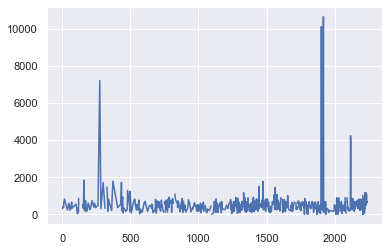

In [245]:
france.dist_from_origin.plot()

In [171]:
riders.to_csv('riders', index=False)
cities.to_csv('cities', index=False)